# Draft

# **Final Project: Tracking covid-19 vaccination to predict when the United states will able to get back to Normal again.**

# Importing Needed Libraires for the project

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

# Loading the Dataset

In [ ]:
url = '/content/country_vaccinations.csv'

In [ ]:
df = pd.read_csv(url)
df.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


# Exploring the Data 

In [ ]:
#Checking the Dimension of the Data before 
df.shape

(15666, 15)

In [ ]:
# Getting the basic info
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,9.437000e+03,8.754000e+03,6.502000e+03,7.928000e+03,1.546500e+04,9437.000000,8754.000000,6502.000000,15465.000000
mean,5.250013e+06,3.302754e+06,1.672178e+06,1.371965e+05,7.948445e+04,16.130694,11.678865,5.945094,3007.500873
std,2.163269e+07,1.233716e+07,7.225403e+06,5.294140e+05,3.641596e+05,23.841769,15.622004,10.306655,4693.064582
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.306400e+04,5.403675e+04,2.461400e+04,3.071750e+03,9.100000e+02,1.400000,1.312500,0.660000,356.000000
50%,4.462850e+05,3.398010e+05,1.818105e+05,1.613000e+04,6.495000e+03,6.650000,5.130000,2.480000,1504.000000
75%,2.003211e+06,1.387596e+06,7.228470e+05,6.386600e+04,3.003600e+04,20.850000,15.510000,6.760000,4020.000000
max,2.977340e+08,1.494623e+08,1.089266e+08,1.160100e+07,7.205286e+06,215.710000,112.750000,102.950000,118759.000000


In [ ]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
15661,Zimbabwe,ZWE,2021-05-02,524199.0,430068.0,94131.0,3900.0,19169.0,3.53,2.89,0.63,1290.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15662,Zimbabwe,ZWE,2021-05-03,537516.0,437751.0,99765.0,13317.0,17987.0,3.62,2.95,0.67,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15663,Zimbabwe,ZWE,2021-05-04,559777.0,452191.0,107586.0,22261.0,17977.0,3.77,3.04,0.72,1210.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15664,Zimbabwe,ZWE,2021-05-05,576233.0,461023.0,115210.0,16456.0,16889.0,3.88,3.10,0.78,1136.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...
15665,Zimbabwe,ZWE,2021-05-06,607355.0,478174.0,129181.0,31122.0,18537.0,4.09,3.22,0.87,1247.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1390390738...


In [ ]:
df.columns


Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [ ]:
# How many countries are we dealing with?

df['country'].nunique()

196

# Let's check out the vaccines for a moment

In [ ]:
df['vaccines'].value_counts()

Oxford/AstraZeneca                                                                    2607
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2389
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         1532
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1418
Pfizer/BioNTech                                                                       1227
Moderna, Pfizer/BioNTech                                                               604
Oxford/AstraZeneca, Sinopharm/Beijing                                                  587
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           499
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      487
Oxford/AstraZeneca, Sinovac                                                            472
Sputnik V                                                                              438

In [ ]:
df[['vaccines', 'country']].value_counts()

vaccines                                      country      
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech  Canada           144
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac   China            143
EpiVacCorona, Sputnik V                       Russia           143
Moderna, Pfizer/BioNTech                      Israel           139
Johnson&Johnson, Moderna, Pfizer/BioNTech     United States    138
                                                              ... 
Oxford/AstraZeneca                            Djibouti           1
Oxford/AstraZeneca, Sinopharm/Beijing         Somalia            1
Sputnik V                                     Armenia            1
Oxford/AstraZeneca                            Timor              1
Oxford/AstraZeneca, Sinovac, Sputnik V        Libya              1
Length: 196, dtype: int64

In [ ]:
df.groupby('country').max()
# MAX_[MAX_['country']=='United States']
# MAX_['United States']

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,8000.0,0.62,0.62,NaN,206.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
Albania,ALB,2021-05-06,572226.0,6073.0,655.0,23655.0,17565.0,19.88,0.21,0.02,6104.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://twitter.com/gmanastirliu/status/139037...
Algeria,DZA,2021-02-19,75000.0,NaN,NaN,30.0,3748.0,0.17,NaN,NaN,85.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
Andorra,AND,2021-05-03,28881.0,24182.0,4699.0,2829.0,1182.0,37.38,31.30,6.08,15298.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/
Angola,AGO,2021-04-23,456349.0,456349.0,NaN,NaN,18751.0,1.39,1.39,NaN,571.0,Oxford/AstraZeneca,Ministry of Health,https://www.angop.ao/en/noticias/saude/covid-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VEN,2021-04-12,250000.0,250000.0,NaN,NaN,15200.0,0.88,0.88,NaN,535.0,Sputnik V,Government of Venezuela,https://www.swissinfo.ch/spa/coronavirus-venez...
Vietnam,VNM,2021-05-05,675956.0,675956.0,NaN,106846.0,53975.0,0.69,0.69,NaN,555.0,Oxford/AstraZeneca,Government of Vietnam,https://ncov.moh.gov.vn/vi/web/guest/-/6847426...
Wales,OWID_WLS,2021-05-05,2683297.0,1884372.0,798925.0,40211.0,33151.0,85.11,59.77,25.34,10515.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [ ]:
df['vaccines']

0        Oxford/AstraZeneca
1        Oxford/AstraZeneca
2        Oxford/AstraZeneca
3        Oxford/AstraZeneca
4        Oxford/AstraZeneca
                ...        
15661     Sinopharm/Beijing
15662     Sinopharm/Beijing
15663     Sinopharm/Beijing
15664     Sinopharm/Beijing
15665     Sinopharm/Beijing
Name: vaccines, Length: 15666, dtype: object

In [ ]:
# Vaccine used the most
df['vaccines'].max()

'Sputnik V'

In [ ]:
df[df['vaccines']=='Moderna'].max()

country                               NaN
iso_code                              NaN
date                                  NaN
total_vaccinations                    NaN
people_vaccinated                     NaN
people_fully_vaccinated               NaN
daily_vaccinations_raw                NaN
daily_vaccinations                    NaN
total_vaccinations_per_hundred        NaN
people_vaccinated_per_hundred         NaN
people_fully_vaccinated_per_hundred   NaN
daily_vaccinations_per_million        NaN
vaccines                              NaN
source_name                           NaN
source_website                        NaN
dtype: float64

## The origin of the Vaccine Sputnik V is Russia, developped by health ministry.

In [ ]:

df[df['vaccines']=='Sputnik V'].value_counts().sum()


60

In [ ]:
df.drop('source_website', axis=1, inplace=True)

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan


In [ ]:
# Dropping the data with Nan values

df.dropna(inplace=True)

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
99,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health
269,Andorra,AND,2021-04-05,15269.0,9781.0,4484.0,2829.0,573.0,19.76,12.66,5.80,7416.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra
519,Argentina,ARG,2021-01-21,265724.0,249372.0,16352.0,17791.0,11704.0,0.59,0.55,0.04,259.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health
520,Argentina,ARG,2021-01-22,279602.0,254456.0,25146.0,13878.0,11263.0,0.62,0.56,0.06,249.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health
521,Argentina,ARG,2021-01-23,288064.0,258876.0,29188.0,8462.0,11124.0,0.64,0.57,0.06,246.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health


In [ ]:
# Vaccine with the least shots
df['vaccines'].min()

'CanSino, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V'

In [ ]:
df[df['vaccines'] == 'Sinopharm/Beijing'].count().sum()

644

In [ ]:
# How many vaccines have been developped

df['vaccines'].nunique()


29

#USA Data


In [ ]:

data = df[df['country']== "United States"]

In [ ]:
# 
data.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
15117,United States,USA,2021-01-14,11148991.0,9690757.0,1342086.0,870529.0,747082.0,3.33,2.90,0.40,2234.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15118,United States,USA,2021-01-15,12279180.0,10595866.0,1610524.0,1130189.0,798707.0,3.67,3.17,0.48,2388.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15123,United States,USA,2021-01-20,16525281.0,14270441.0,2161419.0,817693.0,892403.0,4.94,4.27,0.65,2668.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15124,United States,USA,2021-01-21,17546374.0,15053257.0,2394961.0,1021093.0,913912.0,5.25,4.50,0.72,2733.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15125,United States,USA,2021-01-22,19107959.0,16243093.0,2756953.0,1561585.0,975540.0,5.71,4.86,0.82,2917.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15126,United States,USA,2021-01-23,20537990.0,17390345.0,3027865.0,1430031.0,1057387.0,6.14,5.20,0.91,3162.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15127,United States,USA,2021-01-24,21848655.0,18502131.0,3216836.0,1310665.0,1122182.0,6.53,5.53,0.96,3355.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15128,United States,USA,2021-01-25,22734243.0,19252279.0,3346390.0,885588.0,1126251.0,6.80,5.76,1.00,3368.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15129,United States,USA,2021-01-26,23540994.0,19902237.0,3481921.0,806751.0,1119058.0,7.04,5.95,1.04,3346.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15130,United States,USA,2021-01-27,24652634.0,20687970.0,3801053.0,1111640.0,1161050.0,7.37,6.19,1.14,3472.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention


In [ ]:
data.drop(['people_fully_vaccinated_per_hundred', 'iso_code','people_vaccinated'], axis=1).head()

,country,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
15117,United States,2021-01-14,11148991.0,1342086.0,870529.0,747082.0,3.33,2.90,2234.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15118,United States,2021-01-15,12279180.0,1610524.0,1130189.0,798707.0,3.67,3.17,2388.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15123,United States,2021-01-20,16525281.0,2161419.0,817693.0,892403.0,4.94,4.27,2668.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15124,United States,2021-01-21,17546374.0,2394961.0,1021093.0,913912.0,5.25,4.50,2733.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention
15125,United States,2021-01-22,19107959.0,2756953.0,1561585.0,975540.0,5.71,4.86,2917.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention


# EDA

## Creating some simple plot to check out the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 15117 to 15229
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              107 non-null    object 
 1   iso_code                             107 non-null    object 
 2   date                                 107 non-null    object 
 3   total_vaccinations                   107 non-null    float64
 4   people_vaccinated                    107 non-null    float64
 5   people_fully_vaccinated              107 non-null    float64
 6   daily_vaccinations_raw               107 non-null    float64
 7   daily_vaccinations                   107 non-null    float64
 8   total_vaccinations_per_hundred       107 non-null    float64
 9   people_vaccinated_per_hundred        107 non-null    float64
 10  people_fully_vaccinated_per_hundred  107 non-null    float64
 11  daily_vaccinations_per_mil

In [ ]:
print(df['date'].dtype)

object


In [ ]:
data['date']= pd.to_datetime(data['date'])

data['date_num']=data['date'].map(dt.datetime.toordinal)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.date_num=data["date_num"] - 737778


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
d ata.date_num.head()

15117    26
15118    27
15123    32
15124    33
15125    34
Name: date_num, dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 15117 to 15229
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              107 non-null    object        
 1   iso_code                             107 non-null    object        
 2   date                                 107 non-null    datetime64[ns]
 3   total_vaccinations                   107 non-null    float64       
 4   people_vaccinated                    107 non-null    float64       
 5   people_fully_vaccinated              107 non-null    float64       
 6   daily_vaccinations_raw               107 non-null    float64       
 7   daily_vaccinations                   107 non-null    float64       
 8   total_vaccinations_per_hundred       107 non-null    float64       
 9   people_vaccinated_per_hundred        107 non-null    float64       
 10  people_f

In [ ]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,date_num
15117,United States,USA,2021-01-14,11148991.0,9690757.0,1342086.0,870529.0,747082.0,3.33,2.90,0.40,2234.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,26
15118,United States,USA,2021-01-15,12279180.0,10595866.0,1610524.0,1130189.0,798707.0,3.67,3.17,0.48,2388.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,27
15123,United States,USA,2021-01-20,16525281.0,14270441.0,2161419.0,817693.0,892403.0,4.94,4.27,0.65,2668.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,32
15124,United States,USA,2021-01-21,17546374.0,15053257.0,2394961.0,1021093.0,913912.0,5.25,4.50,0.72,2733.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,33
15125,United States,USA,2021-01-22,19107959.0,16243093.0,2756953.0,1561585.0,975540.0,5.71,4.86,0.82,2917.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,34


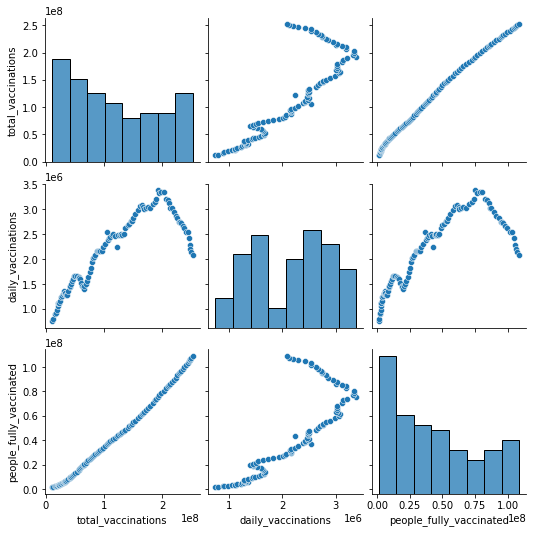

In [ ]:
sns.pairplot(data[['total_vaccinations', 'daily_vaccinations','date',
                  'people_fully_vaccinated']])


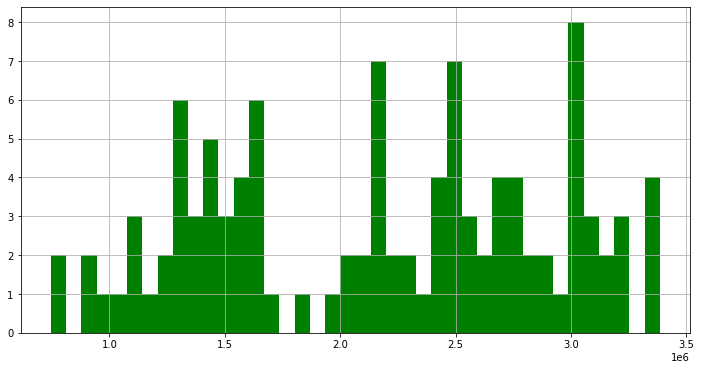

In [ ]:

plt.figure(figsize=(12,6))
data['daily_vaccinations'].hist(bins=40, color='green')

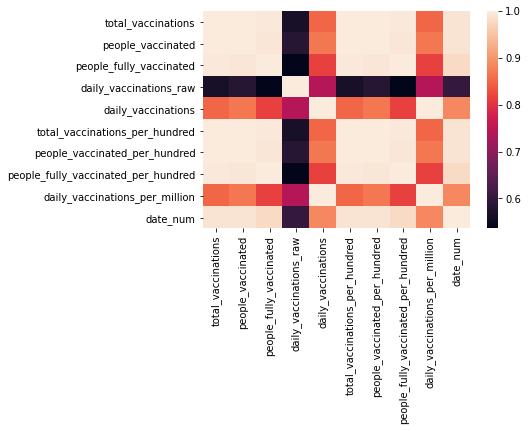

In [ ]:
sns.heatmap(data=data.corr())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 15117 to 15229
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              107 non-null    object        
 1   iso_code                             107 non-null    object        
 2   date                                 107 non-null    datetime64[ns]
 3   total_vaccinations                   107 non-null    float64       
 4   people_vaccinated                    107 non-null    float64       
 5   people_fully_vaccinated              107 non-null    float64       
 6   daily_vaccinations_raw               107 non-null    float64       
 7   daily_vaccinations                   107 non-null    float64       
 8   total_vaccinations_per_hundred       107 non-null    float64       
 9   people_vaccinated_per_hundred        107 non-null    float64       
 10  people_f

In [ ]:
data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'date_num'],
      dtype='object')

# Training our Linear Regression Model

In [ ]:
X = data[['people_fully_vaccinated',
       'daily_vaccinations','date_num',
       'total_vaccinations_per_hundred']]

y = data['total_vaccinations']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=101)


# Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mod = LinearRegression(normalize=True)
mod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Model Evaluation

# Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [ ]:
print(mod.intercept_)

7817.771541386843


In [ ]:
predictions = mod.predict(X_test)


In [ ]:
coeff_df = pd.DataFrame(mod.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
people_fully_vaccinated,-8.065589e-04
daily_vaccinations,-6.460304e-03
date_num,-2.032784e+02
total_vaccinations_per_hundred,3.346092e+06


In [ ]:
data_pre = pd.DataFrame({'Actual': y_test,
                     "Predicted": predictions})
data_pre.sort_index(ascending=True)

,Actual,Predicted
15118,12279180.0,1.227603e+07
15127,21848655.0,2.184064e+07
15134,31123299.0,3.113807e+07
15135,32222402.0,3.220820e+07
15137,33878254.0,3.388068e+07
15142,42417617.0,4.240881e+07
15146,48410558.0,4.842761e+07
15154,61289500.0,6.130462e+07
15155,63090634.0,6.307747e+07
15164,78631601.0,7.862596e+07


In [ ]:
data_pre.Actual.head()

15180    115730008.0
15142     42417617.0
15118     12279180.0
15166     82572848.0
15137     33878254.0
Name: Actual, dtype: float64

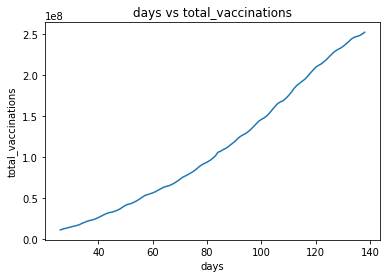

In [ ]:
data.plot(x='date_num', y='total_vaccinations', legend=False, rot=0)
plt.title('days vs total_vaccinations')
plt.xlabel('days')
plt.ylabel('total_vaccinations')
plt.show()


## Importing necessary librairies to check the data result

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# The mean squared error
print('Mean Squared error: %.2f'% mean_squared_error(y_test, predictions))

Mean Squared error: 121570089.35


In [ ]:
# The coefficient
print(mod.coef_)

[-8.06558926e-04 -6.46030380e-03 -2.03278403e+02  3.34609227e+06]


In [ ]:
# The coefficient of determination trying to get 1, perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, predictions))

Coefficient of determination: 1.00


## Cearting a scatterplot of the real test value vs the predicted values


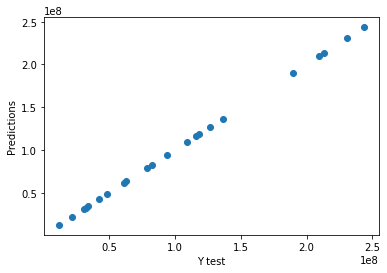

In [ ]:
plt.xlabel('Y test')
plt.ylabel('Predictions')

plt.scatter(y_test, predictions)

# Evaluating the Model

## Let's Vealuate our model performance 

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score

print('MAE:', mean_absolute_error(y_test, predictions))
print('MAE:', mean_squared_error(y_test, predictions))
print('MAE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 9629.925912040371
MAE: 121570089.35217942
MAE: 11025.882701724131


In [ ]:
print('Coefficient of determination: %.2f'% r2_score(y_test, predictions))

Coefficient of determination: 1.00


In [ ]:
print('Expained variance score:', explained_variance_score(y_test, predictions))

Expained variance score: 0.9999999757808778


# Residuals


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


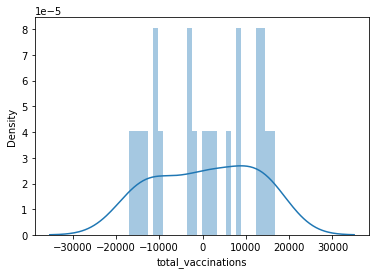

In [ ]:
sns.distplot((y_test - predictions), bins=30)

Conclusion

In [ ]:
coeff = pd.DataFrame(mod.coef_, X.columns)

coeff.columns = ['coefficient']
coeff

,coefficient
people_fully_vaccinated,-8.065589e-04
daily_vaccinations,-6.460304e-03
date_num,-2.032784e+02
total_vaccinations_per_hundred,3.346092e+06


Ploynomial Regression

In [ ]:
X = data[['date_num']]
y = data['total_vaccinations']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=101)

In [ ]:
lin = LinearRegression()

In [ ]:
lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = lin.predict(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

In [ ]:
poly.fit(X_poly, y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
lin2 = LinearRegression()

In [ ]:
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_train.head()

,date_num
15222,131
15160,69
15144,53
15147,56
15143,52


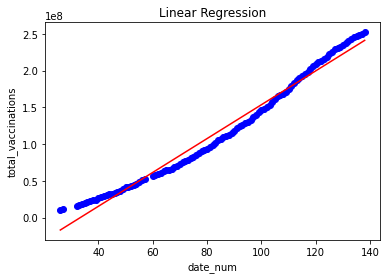

In [ ]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('date_num')
plt.ylabel('total_vaccinations')
  
plt.show()

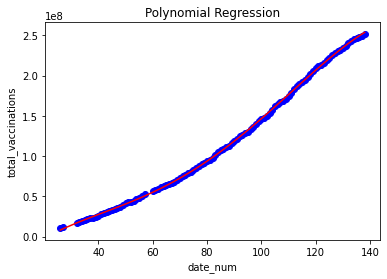

In [ ]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('date_num')
plt.ylabel('total_vaccinations')
  
plt.show()

In [ ]:
coeff2 = pd.DataFrame(lin.coef_, X.columns)

coeff2.columns = ['coefficient']
coeff2

,coefficient
date_num,2.301664e+06


In [ ]:
print('Coefficient of determination: %.2f'% r2_score(y_test, pred))

Coefficient of determination: 0.97


In [ ]:
print('Expained variance score:', explained_variance_score(y_test, pred))

Expained variance score: 0.9703452179785119


**Yay!!! It is working** *I am proud of myself*